#Importing Libraries

In [46]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers

import pandas as pd
import numpy as np
import pdb
from sklearn.model_selection import train_test_split
from google.colab import files
import io
import cv2,glob
from os import listdir
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

%matplotlib inline

#Mounting Google drive

All the images are stored in drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Uploading the annotations file

In [48]:
uploaded = files.upload()    # Will prompt you to select file
labels = pd.read_csv(io.BytesIO(uploaded['annotations.csv']))

Saving annotations.csv to annotations (1).csv


#Loading one of the images in image dataset

A sample file name: 185550.jpg
Shape information of two arbitrary images: (471, 365, 3) - this one is shown below, and (471, 365, 3)


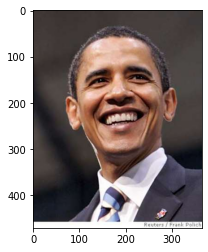

In [49]:
dir_struct = '/content/drive/MyDrive/all/' #give the path of image folder

file_lst = listdir(dir_struct)

  
print('A sample file name: {}'.format(file_lst[6]))
image = cv2.imread(dir_struct+file_lst[6])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('Shape information of two arbitrary images: {} - this one is shown below, and {}'.format(image.shape, cv2.imread(dir_struct+file_lst[6]).shape))
plt.imshow(image)

#Loading all the images to a array

In [50]:
image_lst = []

for i in range(labels.shape[0]): # read the image one by one
    image = cv2.imread(dir_struct+labels.iloc[i]['Images'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA) 
    image_lst.append(image) # appending the read image to a list

#Loading annotated values to a numpy array.

In [51]:
freakles = np.array(labels["freakles"])
glasses = np.array(labels["glasses"])
haircolor = np.array(labels["hair color"])
hairtop = np.array(labels["hair top"])
wrinkles = np.array(labels["wrinkles"])

#Making Test and Training sets

In [52]:
freakles_train_images, freakles_test_images, freakles_train_labels, freakles_test_labels = train_test_split(np.array(image_lst), freakles, test_size=0.2)
glasses_train_images, glasses_test_images, glasses_train_labels, glasses_test_labels = train_test_split(np.array(image_lst), glasses, test_size=0.2)
haircolor_train_images, haircolor_test_images, haircolor_train_labels, haircolor_test_labels = train_test_split(np.array(image_lst), haircolor, test_size=0.2)
hairtop_train_images, hairtop_test_images, hairtop_train_labels, hairtop_test_labels = train_test_split(np.array(image_lst), hairtop, test_size=0.2)
wrinkles_train_images, wrinkles_test_images, wrinkles_train_labels, wrinkles_test_labels = train_test_split(np.array(image_lst), wrinkles, test_size=0.2)

Verifying freakles images

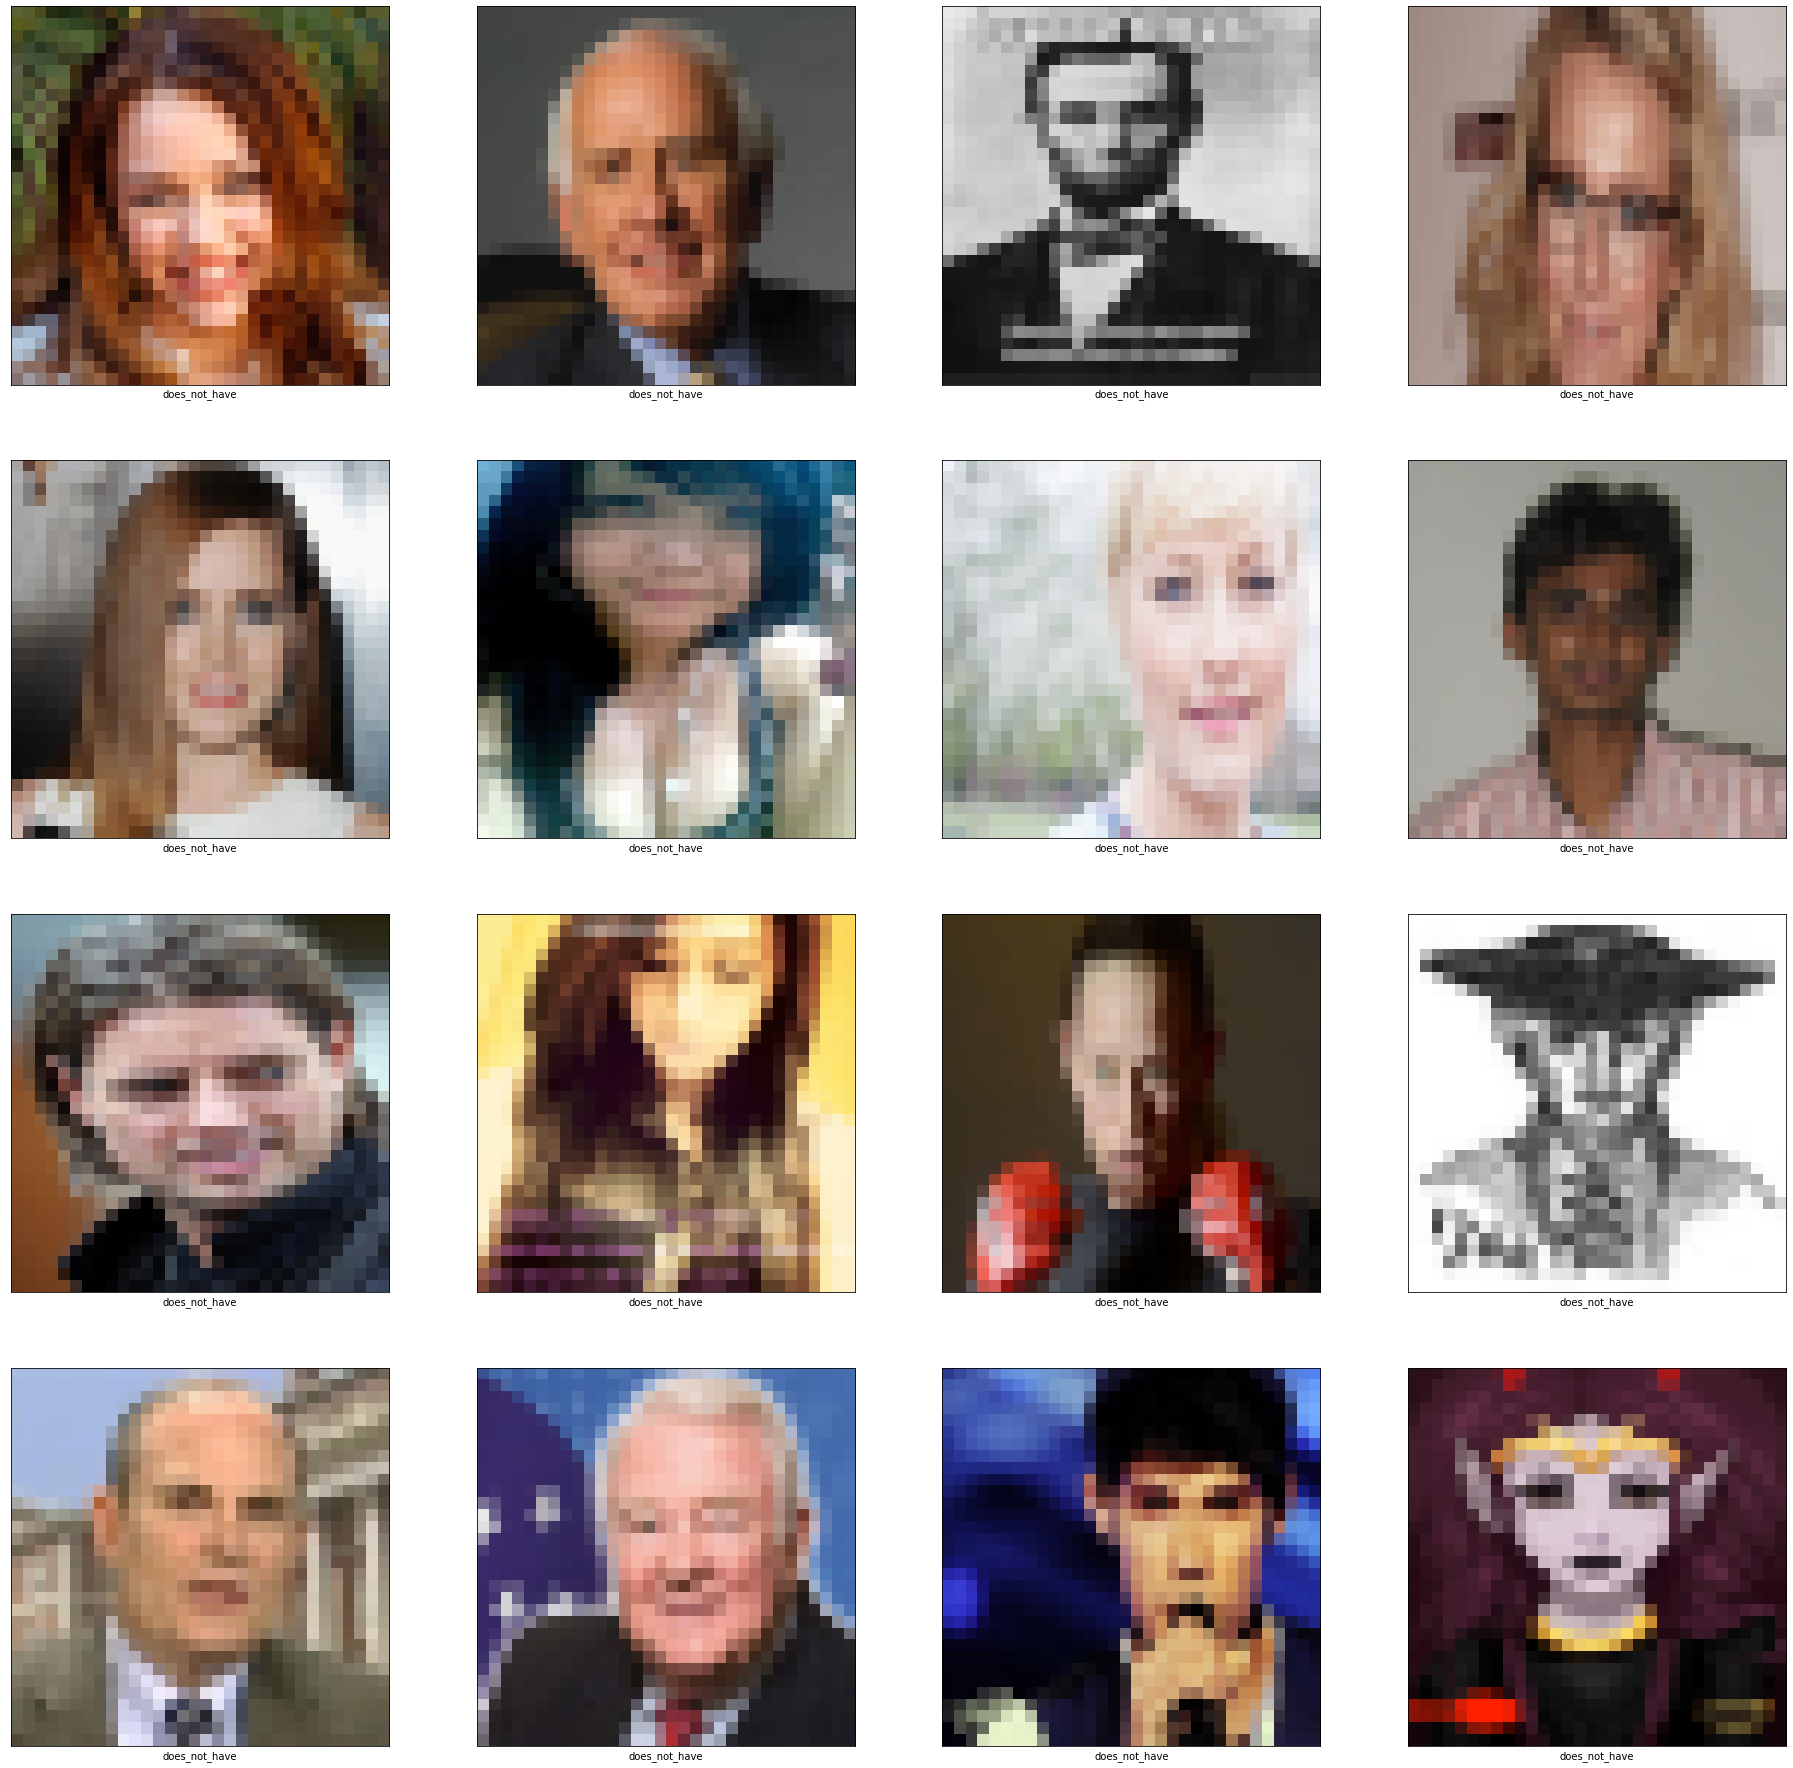

In [53]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
freakles_class_names = ['does_not_have', 'has']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(freakles_train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(freakles_class_names[freakles_train_labels[i]])
plt.show()

Verifying glasses images

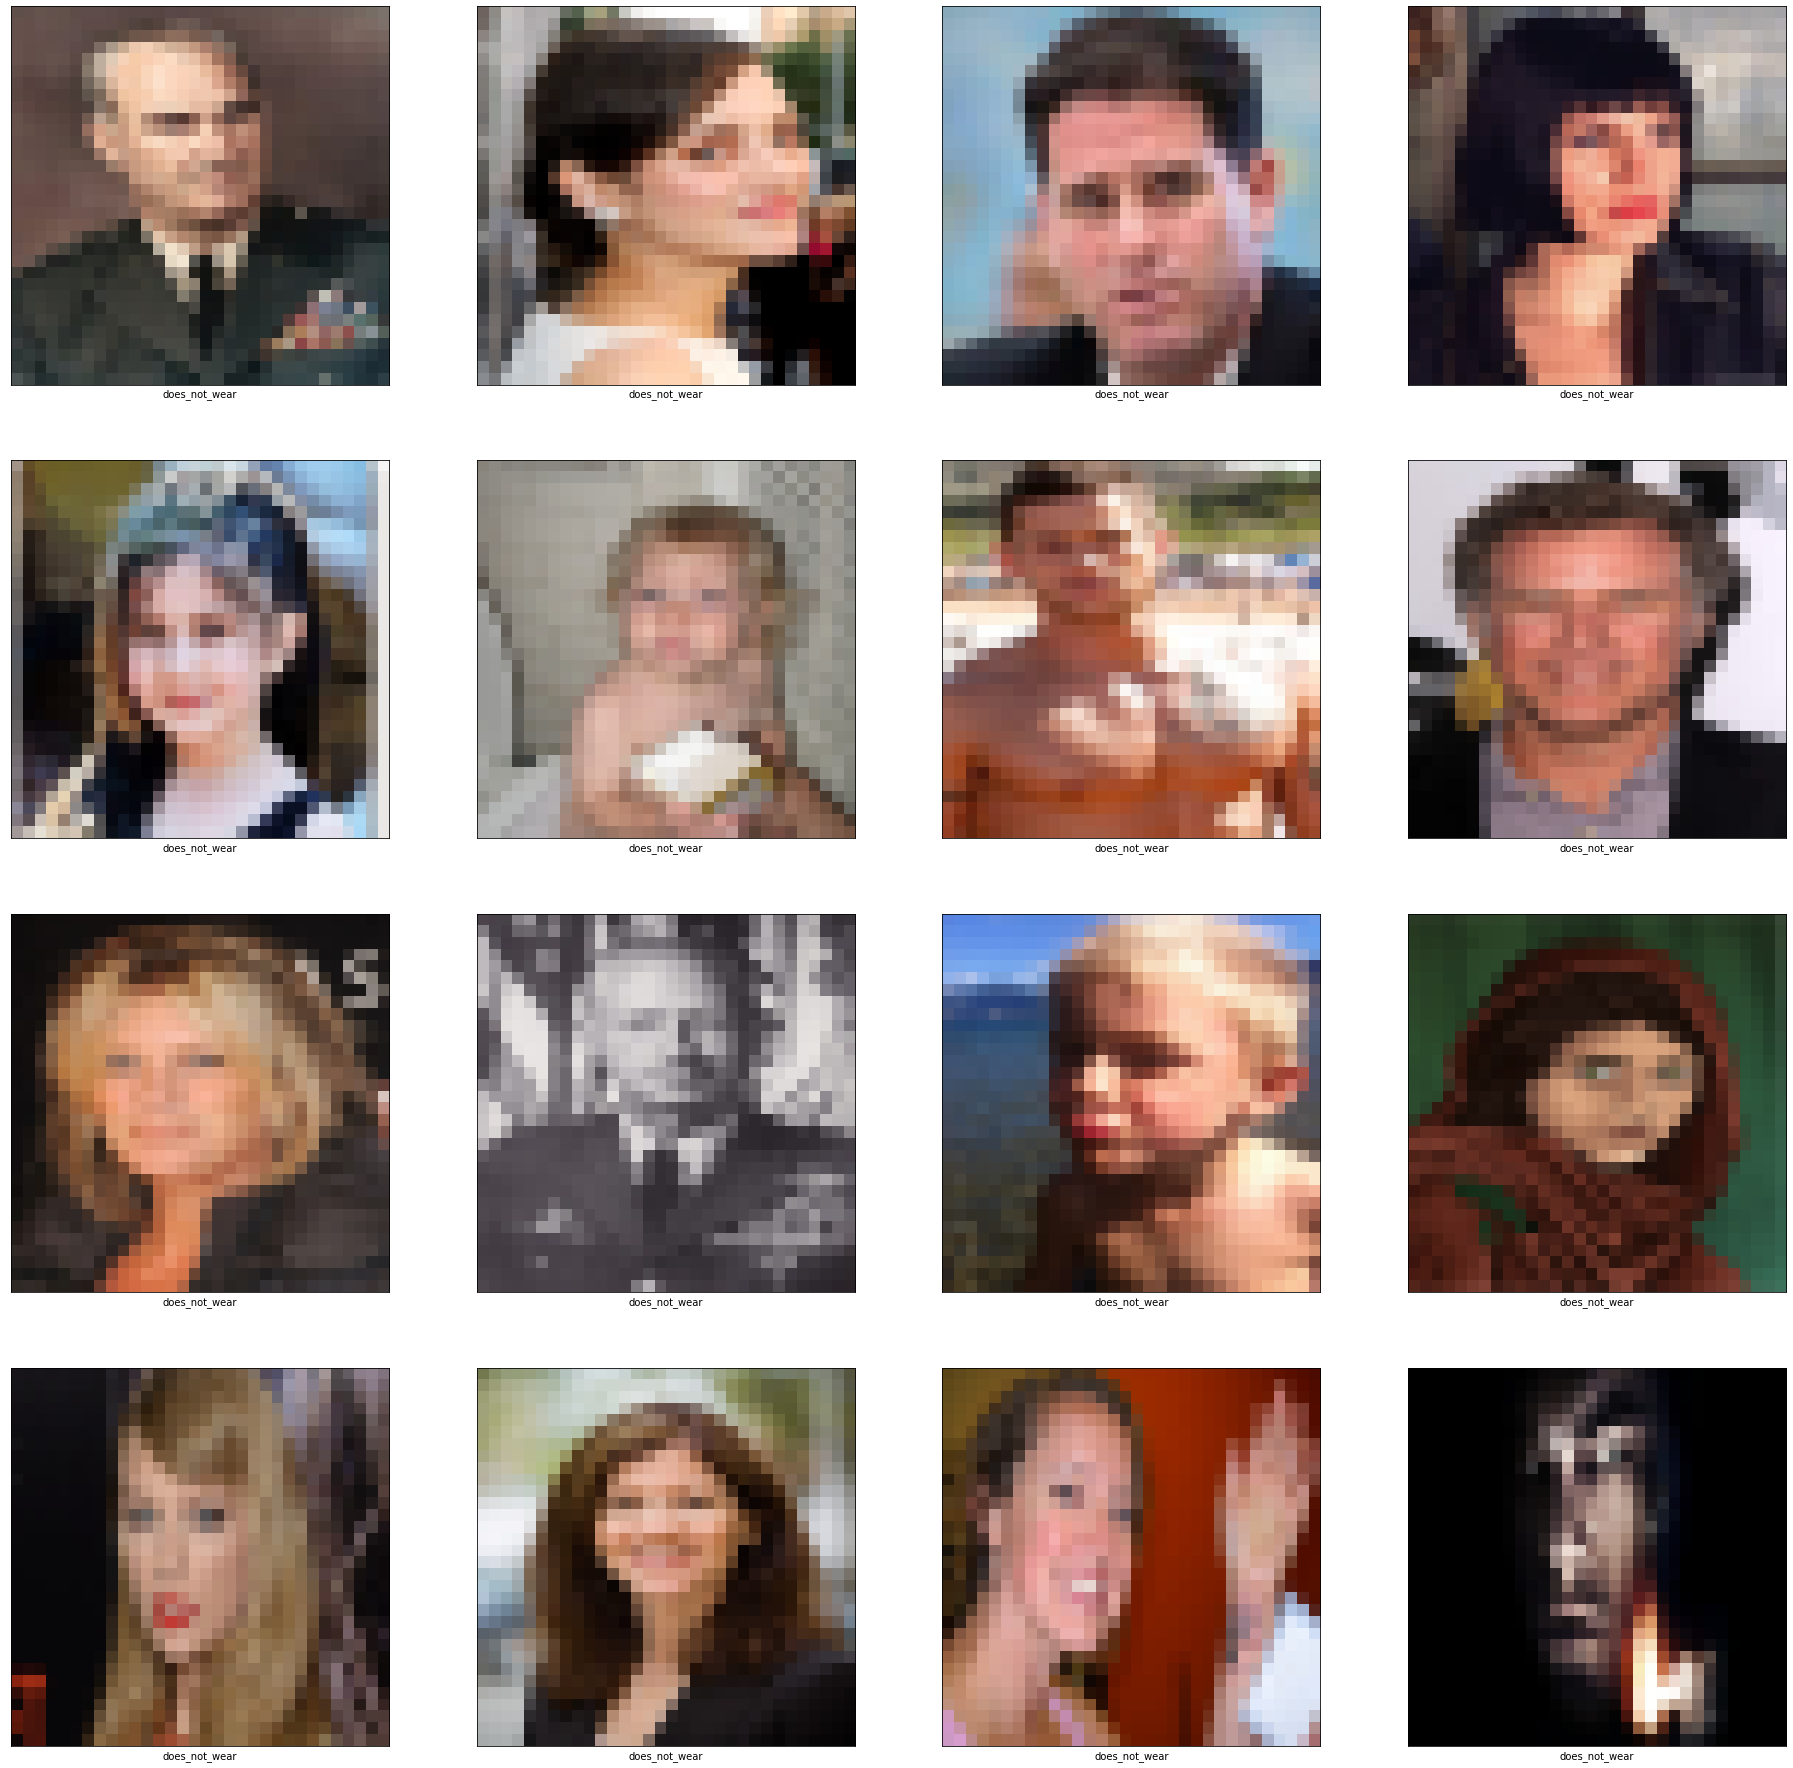

In [54]:
glasses_class_names = ['does_not_wear', 'wear_ normal', 'wear_sunglasses']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(glasses_train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(glasses_class_names[glasses_train_labels[i]])
plt.show()

Verifying hair color images

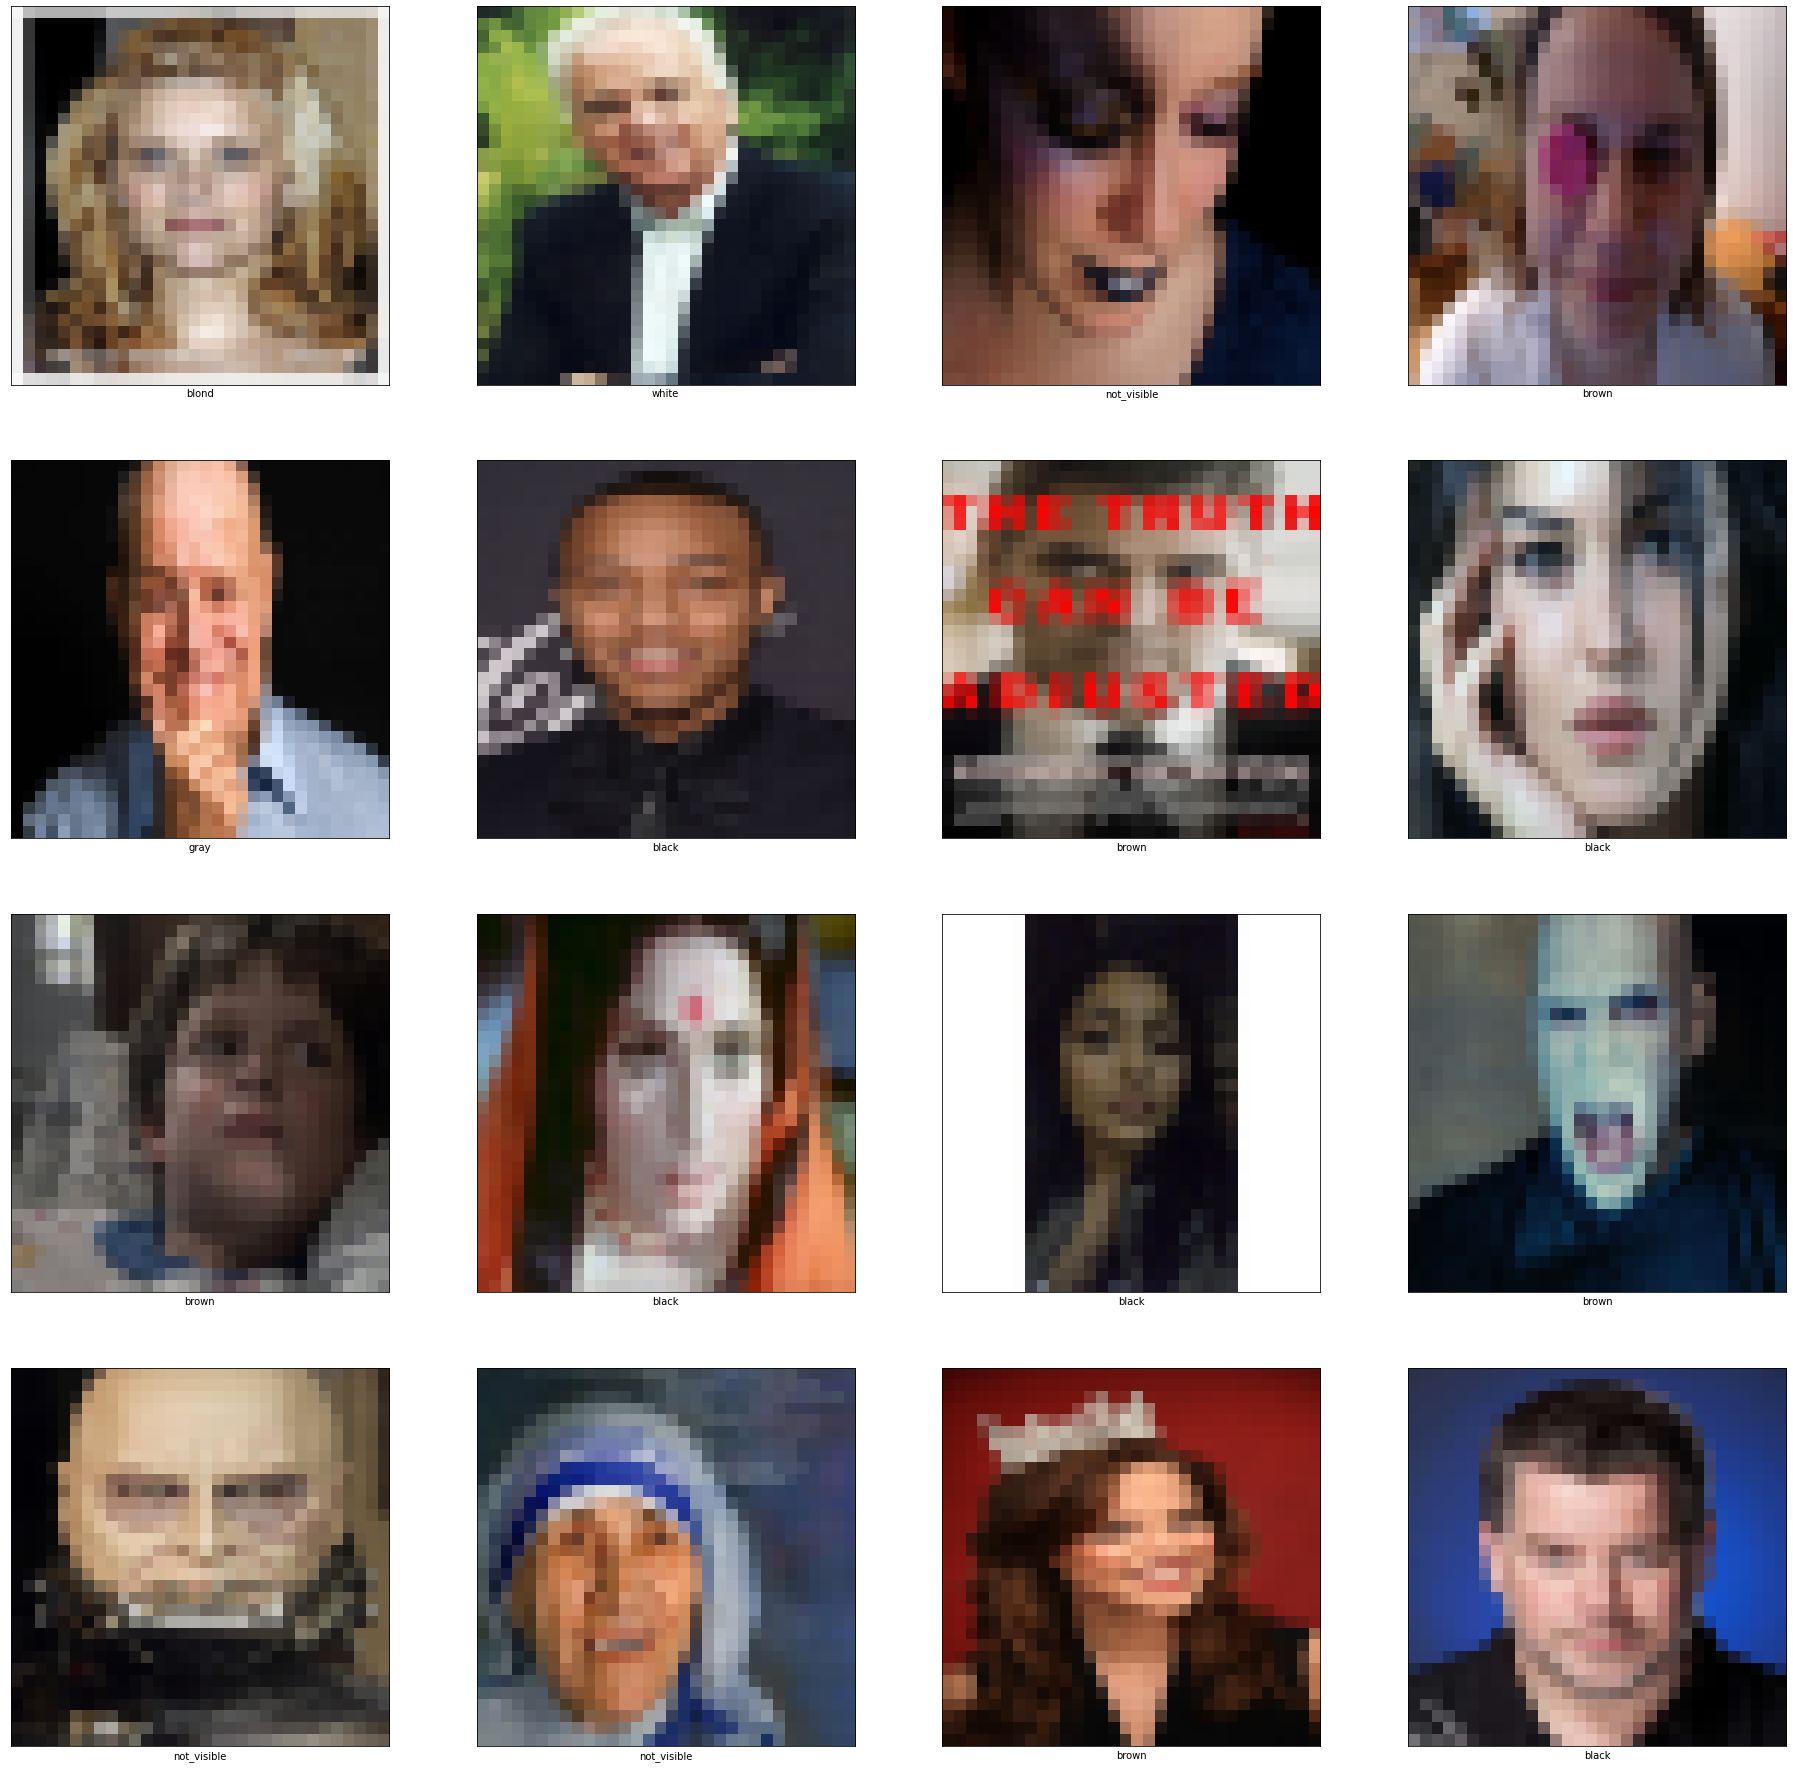

In [55]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
haircolor_class_names = ['brown', 'black', 'gray', 'blond', 'red', 'white', 'mixed', 'other','not_visible']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(haircolor_train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(haircolor_class_names[haircolor_train_labels[i]])
plt.show()

Verifying hairtop images

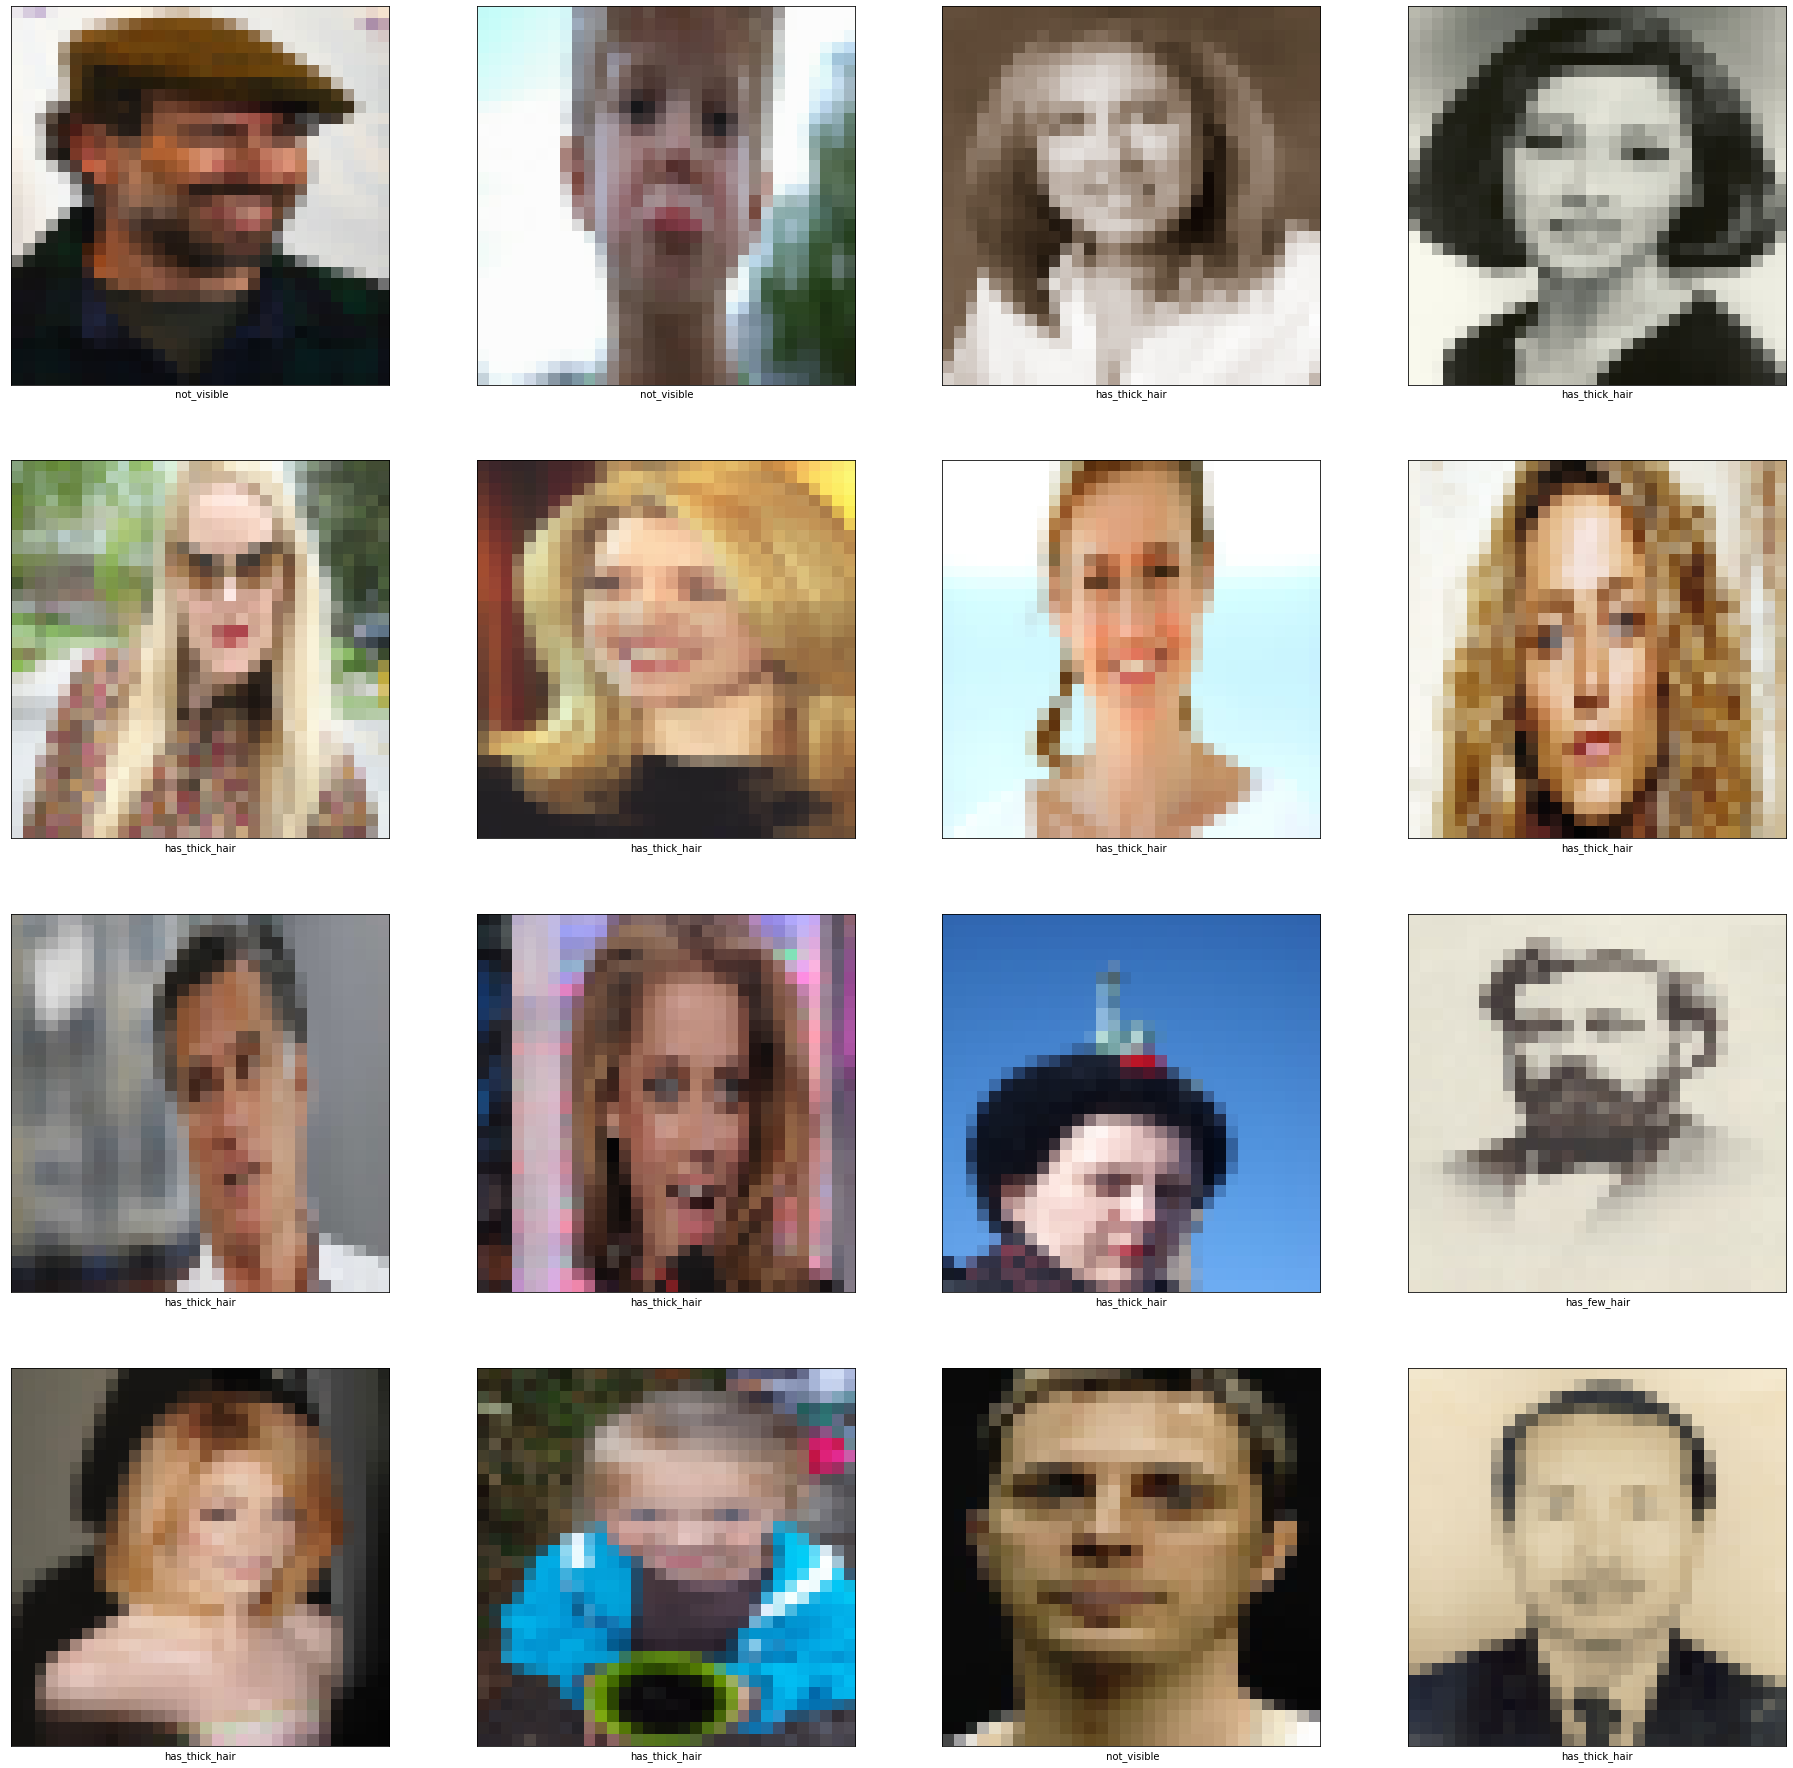

In [57]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
hairtop_class_names = ['bald_or_shaved', 'has_few_hair', 'has_thick_hair', ' not_visible']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hairtop_train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(hairtop_class_names[hairtop_train_labels[i]])
plt.show()

Verifying wrinkles images

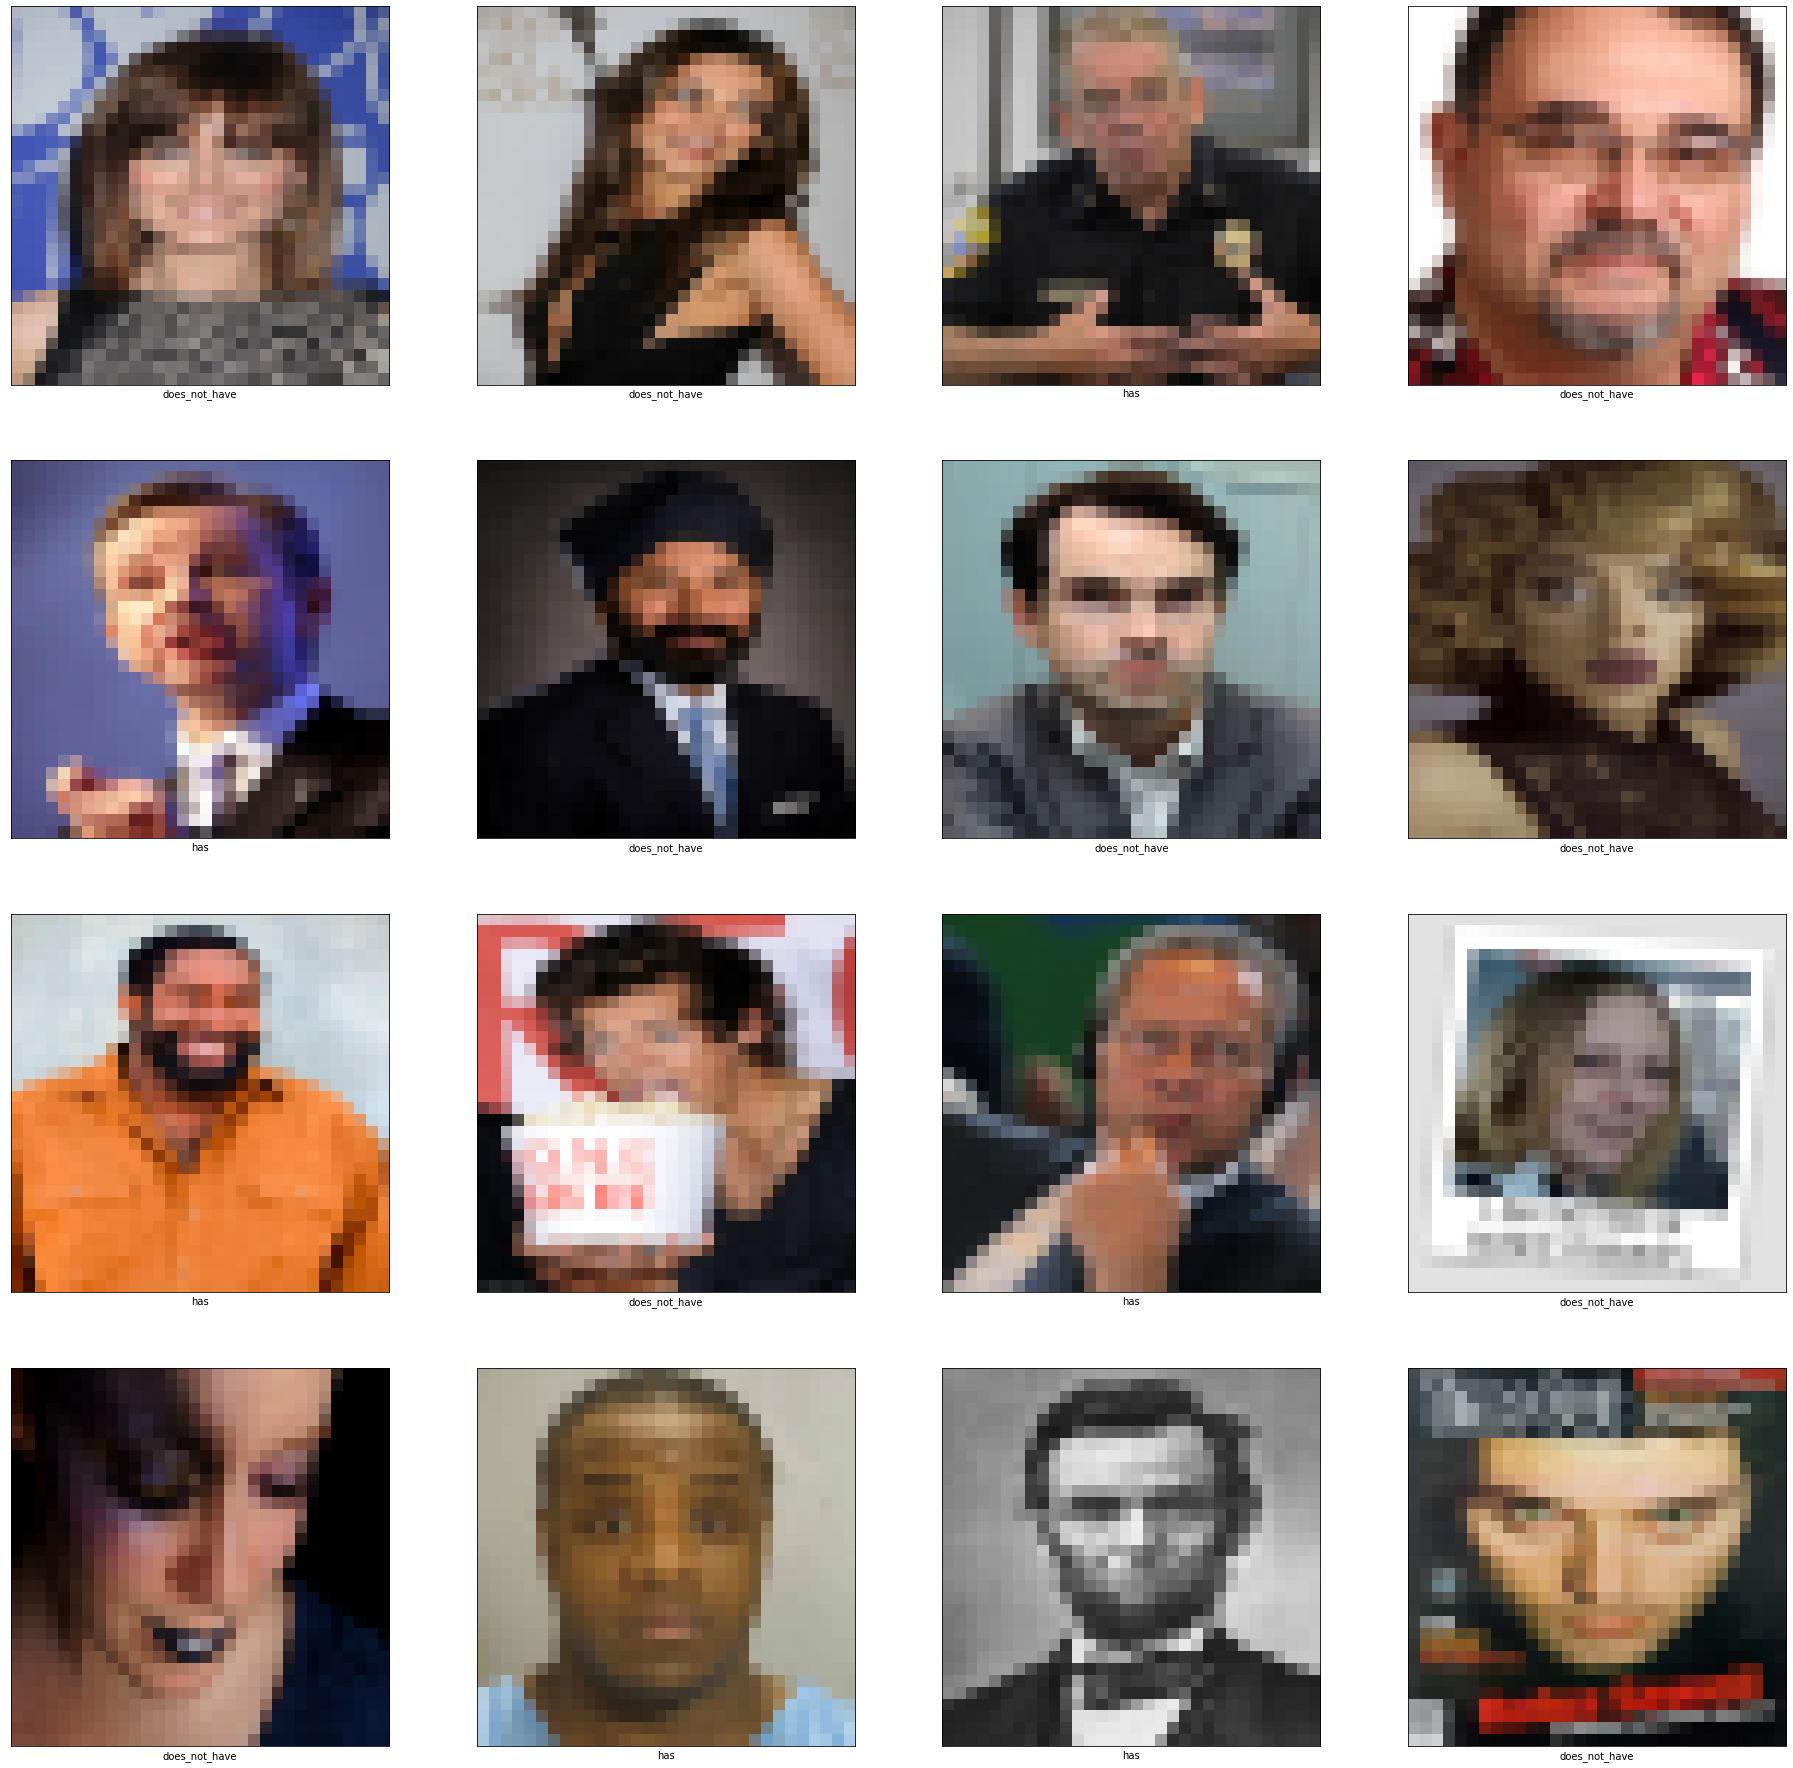

In [58]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
wrinkles_class_names = ['does_not_have', 'has']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wrinkles_train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(wrinkles_class_names[wrinkles_train_labels[i]])
plt.show()

In [23]:
# # Normalizing
# freakles_train_images, freakles_test_images = freakles_train_images / 255.0, freakles_test_images / 255.0
# # Normalizing
# glasses_train_images, glasses_test_images = glasses_train_images / 255.0, glasses_test_images / 255.0
# # Normalizing
# haircolor_train_images, haircolor_test_images = haircolor_train_images / 255.0, haircolor_test_images / 255.0
# # Normalizing
# hairtop_train_images, hairtop_test_images = hairtop_train_images / 255.0, hairtop_test_images / 255.0
# # Normalizing
# wrinkles_train_images, wrinkles_test_images = wrinkles_train_images / 255.0, wrinkles_test_images / 255.0

In [59]:
#Standardizing 
import pdb
def standardize(image_data):
        image_data = image_data.astype(float)
        mean = np.mean(image_data, axis=0)
        image_data -= mean
        std = np.std(image_data, axis=0)
        image_data /= std
        return image_data, mean, std


freakles_train_images, mean, std =   standardize(freakles_train_images)
glasses_train_images, mean, std =   standardize(glasses_train_images)
haircolor_train_images, mean, std =   standardize(haircolor_train_images)
hairtop_train_images, mean, std =   standardize(hairtop_train_images)
wrinkles_train_images, mean, std =   standardize(wrinkles_train_images)

def standardize_test(image_data, mean, std):
        image_data = image_data.astype(float)
        image_data -= mean
        image_data /= std
        return image_data


freakles_test_images =  standardize_test(freakles_test_images, mean, std)
glasses_test_images =  standardize_test(glasses_test_images, mean, std)
haircolor_test_images =  standardize_test(haircolor_test_images, mean, std)
hairtop_test_images =  standardize_test(hairtop_test_images, mean, std)
wrinkles_test_images =  standardize_test(wrinkles_test_images, mean, std)



# Using the built-in Keras code and weights of VGG16

In [60]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(32, 32, 3)) 
    


# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

#Training the model on freakles

Epoch 1/10
4/4 [==============================] - 2s 215ms/step - loss: 1.5847 - accuracy: 0.4861 - val_loss: 0.3887 - val_accuracy: 0.9621
Epoch 2/10
4/4 [==============================] - 1s 152ms/step - loss: 0.2905 - accuracy: 0.9679 - val_loss: 0.2034 - val_accuracy: 0.9621
Epoch 3/10
4/4 [==============================] - 1s 153ms/step - loss: 0.1608 - accuracy: 0.9693 - val_loss: 0.1717 - val_accuracy: 0.9621
Epoch 4/10
4/4 [==============================] - 1s 151ms/step - loss: 0.1508 - accuracy: 0.9674 - val_loss: 0.1664 - val_accuracy: 0.9621
Epoch 5/10
4/4 [==============================] - 1s 152ms/step - loss: 0.1475 - accuracy: 0.9676 - val_loss: 0.1719 - val_accuracy: 0.9621
Epoch 6/10
4/4 [==============================] - 1s 155ms/step - loss: 0.1435 - accuracy: 0.9695 - val_loss: 0.1706 - val_accuracy: 0.9621
Epoch 7/10
4/4 [==============================] - 1s 155ms/step - loss: 0.1488 - accuracy: 0.9671 - val_loss: 0.1662 - val_accuracy: 0.9621
Epoch 8/10
4/4 [====

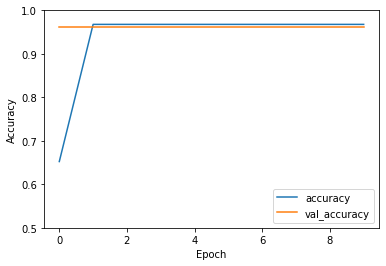

In [61]:
# Training
history = model.fit(freakles_train_images, freakles_train_labels, epochs=10, batch_size=512,
                    validation_data=(freakles_test_images, freakles_test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(freakles_test_images,  freakles_test_labels, verbose=2)

print(test_acc)

#Testing the model on freakles in test image set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

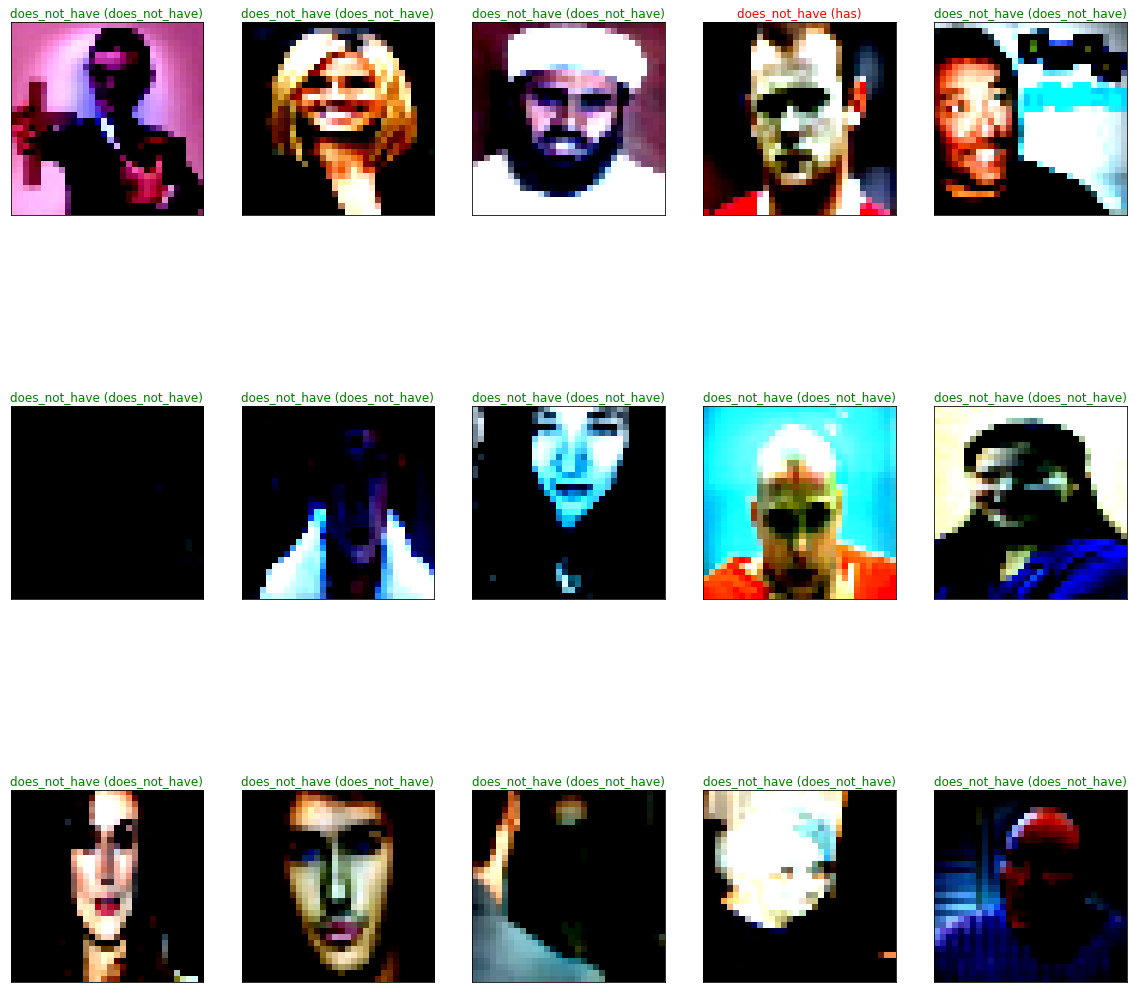

In [62]:

y_hat = model.predict(freakles_test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(freakles_test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(freakles_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = freakles_test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(freakles_class_names[predict_index], 
                                  freakles_class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Evaluating freakles model performance

In [63]:

y_pred1 = model.predict(freakles_test_images)
y_pred = np.argmax(y_pred1, axis=1)


print(classification_report(freakles_test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(freakles_test_labels, y_pred , average="macro"))
print(recall_score(freakles_test_labels, y_pred , average="macro"))

print(f1_score(freakles_test_labels, y_pred , average="macro"))
print(f1_score(freakles_test_labels, y_pred , average="micro"))
print(f1_score(freakles_test_labels, y_pred , average="weighted"))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       381
           1       0.00      0.00      0.00        15

    accuracy                           0.96       396
   macro avg       0.48      0.50      0.49       396
weighted avg       0.93      0.96      0.94       396

0.4810606060606061
0.5
0.49034749034749037
0.9621212121212122
0.9435474435474436


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the freakles model

In [64]:
model.save('/content/drive/MyDrive/test1/freakles.h5')

#Training the model on glasses

Epoch 1/10
4/4 [==============================] - 1s 161ms/step - loss: 0.4704 - accuracy: 0.8957 - val_loss: 0.3841 - val_accuracy: 0.8939
Epoch 2/10
4/4 [==============================] - 1s 152ms/step - loss: 0.4423 - accuracy: 0.8957 - val_loss: 0.3689 - val_accuracy: 0.8939
Epoch 3/10
4/4 [==============================] - 1s 152ms/step - loss: 0.4086 - accuracy: 0.8957 - val_loss: 0.3662 - val_accuracy: 0.8939
Epoch 4/10
4/4 [==============================] - 1s 161ms/step - loss: 0.3917 - accuracy: 0.8957 - val_loss: 0.3726 - val_accuracy: 0.8939
Epoch 5/10
4/4 [==============================] - 1s 157ms/step - loss: 0.3858 - accuracy: 0.8957 - val_loss: 0.3802 - val_accuracy: 0.8939
Epoch 6/10
4/4 [==============================] - 1s 153ms/step - loss: 0.3902 - accuracy: 0.8957 - val_loss: 0.3662 - val_accuracy: 0.8939
Epoch 7/10
4/4 [==============================] - 1s 157ms/step - loss: 0.3799 - accuracy: 0.8957 - val_loss: 0.3717 - val_accuracy: 0.8939
Epoch 8/10
4/4 [====

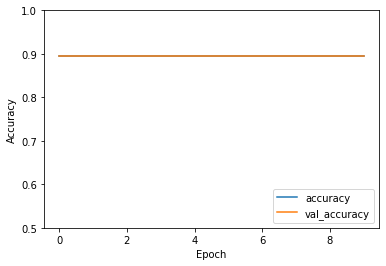

In [65]:
# Training
history = model.fit(glasses_train_images, glasses_train_labels, epochs=10, batch_size=512,
                    validation_data=(glasses_test_images, glasses_test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(glasses_test_images,  glasses_test_labels, verbose=2)

print(test_acc)

#Testing the model on glasses in test image set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

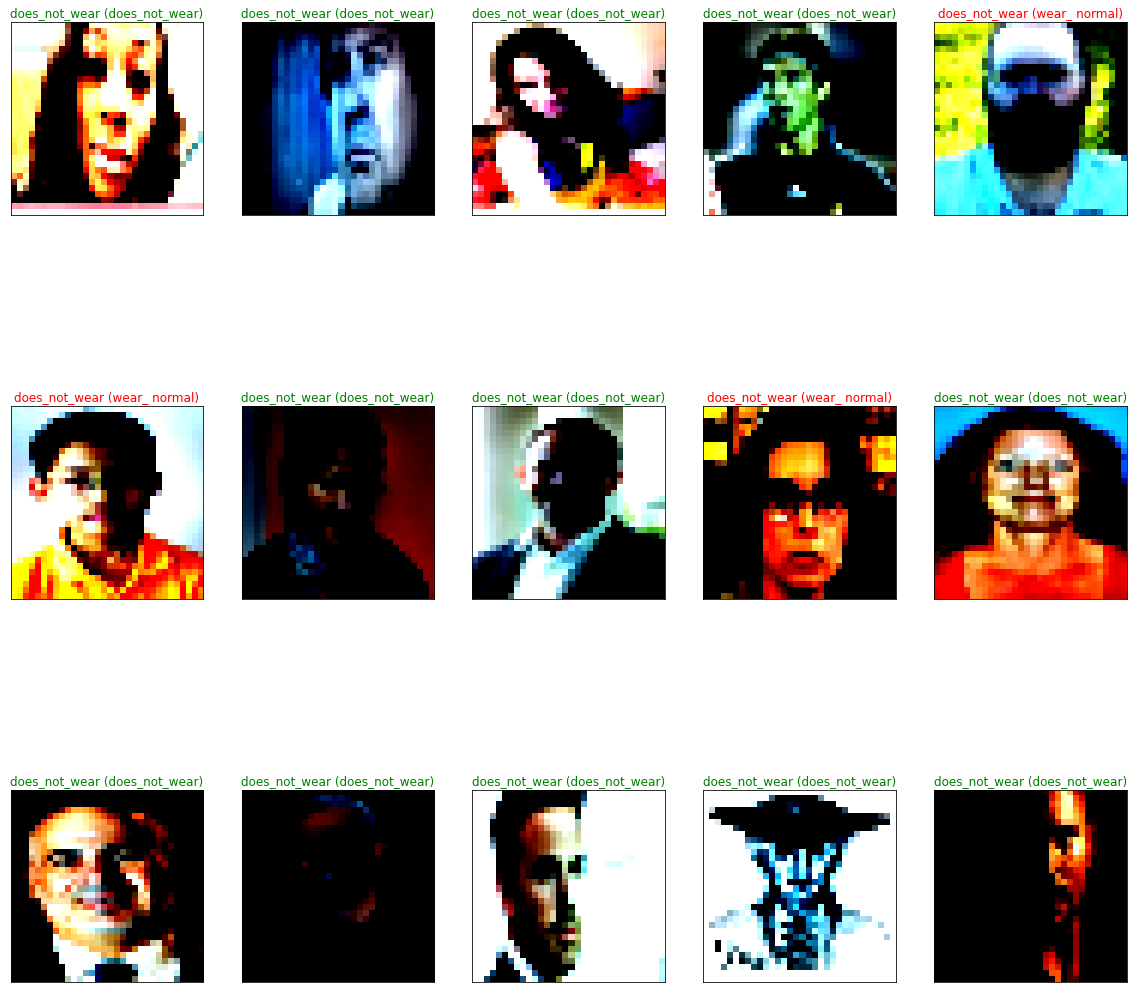

In [66]:
y_hat = model.predict(glasses_test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(glasses_test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(glasses_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = glasses_test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(glasses_class_names[predict_index], 
                                  glasses_class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Evaluating glasses model performance

In [67]:
y_pred1 = model.predict(glasses_test_images)
y_pred = np.argmax(y_pred1, axis=1)


print(classification_report(glasses_test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(glasses_test_labels, y_pred , average="macro"))
print(recall_score(glasses_test_labels, y_pred , average="macro"))

print(f1_score(glasses_test_labels, y_pred , average="macro"))
print(f1_score(glasses_test_labels, y_pred , average="micro"))
print(f1_score(glasses_test_labels, y_pred , average="weighted"))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       354
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00         2

    accuracy                           0.89       396
   macro avg       0.30      0.33      0.31       396
weighted avg       0.80      0.89      0.84       396

0.29797979797979796
0.3333333333333333
0.31466666666666665
0.8939393939393939
0.8438787878787879


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the glasses model

In [68]:
model.save('/content/drive/MyDrive/test1/glasses.h5')

#Training the model on haircolor

Epoch 1/10
4/4 [==============================] - 1s 161ms/step - loss: 3.8565 - accuracy: 0.2225 - val_loss: 2.0724 - val_accuracy: 0.3283
Epoch 2/10
4/4 [==============================] - 1s 155ms/step - loss: 1.9545 - accuracy: 0.3534 - val_loss: 2.1332 - val_accuracy: 0.3308
Epoch 3/10
4/4 [==============================] - 1s 154ms/step - loss: 1.9136 - accuracy: 0.3578 - val_loss: 1.8083 - val_accuracy: 0.3308
Epoch 4/10
4/4 [==============================] - 1s 153ms/step - loss: 1.8042 - accuracy: 0.3578 - val_loss: 1.7950 - val_accuracy: 0.3308
Epoch 5/10
4/4 [==============================] - 1s 155ms/step - loss: 1.7774 - accuracy: 0.3578 - val_loss: 1.7702 - val_accuracy: 0.3308
Epoch 6/10
4/4 [==============================] - 1s 156ms/step - loss: 1.7663 - accuracy: 0.3578 - val_loss: 1.7701 - val_accuracy: 0.3308
Epoch 7/10
4/4 [==============================] - 1s 154ms/step - loss: 1.7690 - accuracy: 0.3578 - val_loss: 1.7589 - val_accuracy: 0.3308
Epoch 8/10
4/4 [====

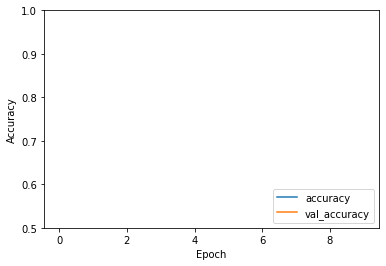

In [69]:
# Training
history = model.fit(haircolor_train_images, haircolor_train_labels, epochs=10, batch_size=512,
                    validation_data=(haircolor_test_images, haircolor_test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(haircolor_test_images,  haircolor_test_labels, verbose=2)

print(test_acc)

#Testing the model on haircolor in test image set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

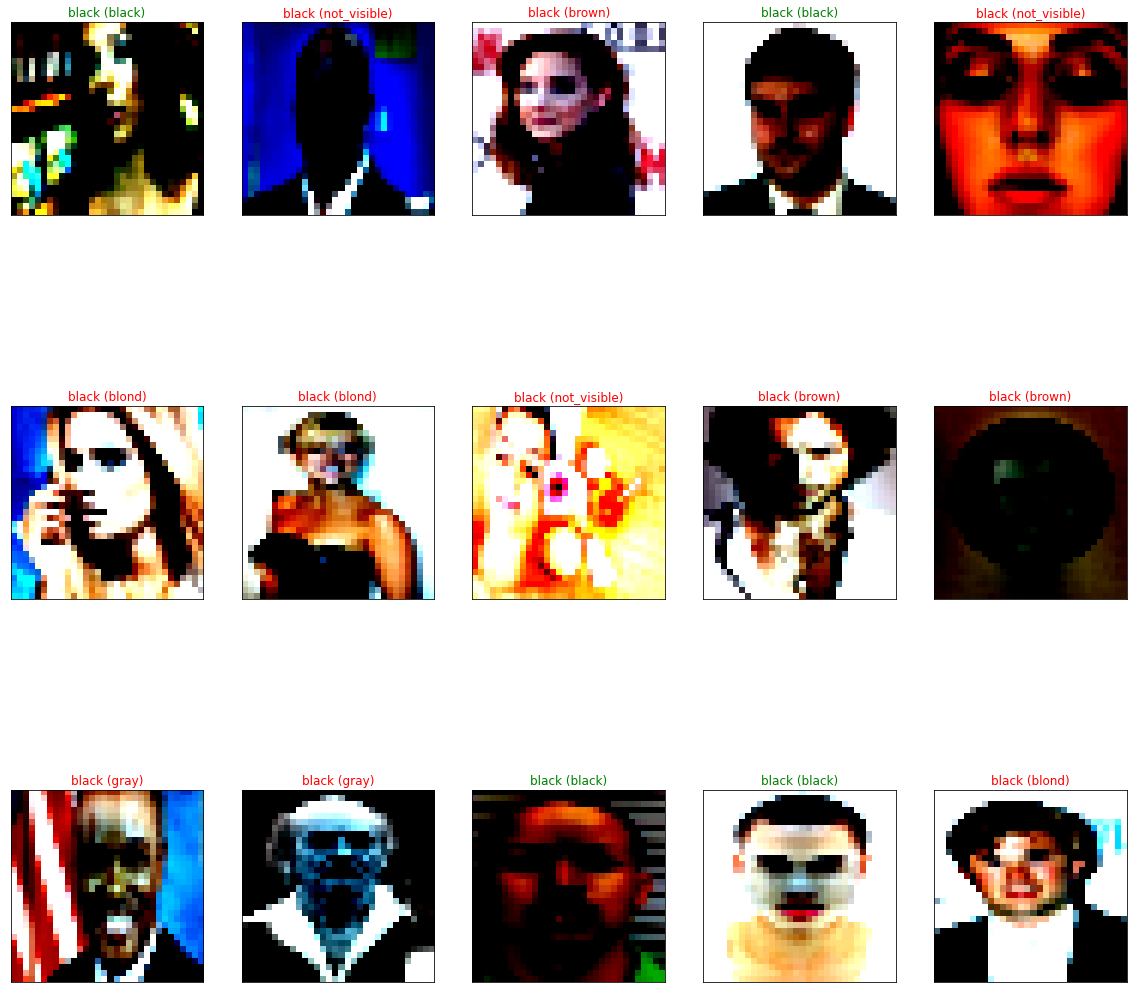

In [70]:
y_hat = model.predict(haircolor_test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(haircolor_test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(haircolor_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = haircolor_test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(haircolor_class_names[predict_index], 
                                  haircolor_class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Evaluating haircolor model performance

In [72]:
y_pred1 = model.predict(haircolor_test_images)
y_pred = np.argmax(y_pred1, axis=1)


print(classification_report(haircolor_test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(haircolor_test_labels, y_pred , average="macro"))
print(recall_score(glasses_test_labels, y_pred , average="macro"))

print(f1_score(haircolor_test_labels, y_pred , average="macro"))
print(f1_score(haircolor_test_labels, y_pred , average="micro"))
print(f1_score(haircolor_test_labels, y_pred , average="weighted"))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.33      1.00      0.50       131
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        50

    accuracy                           0.33       396
   macro avg       0.04      0.11      0.06       396
weighted avg       0.11      0.33      0.16       396

0.03675645342312009
0.3333333333333333
0.0552393000210837
0.33080808080808083
0.1644624614264083


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the glasses model

In [73]:
model.save('/content/drive/MyDrive/test1/haircolor.h5')

#Training the model on hairtop

Epoch 1/10
4/4 [==============================] - 1s 169ms/step - loss: 2.0691 - accuracy: 0.1283 - val_loss: 1.6182 - val_accuracy: 0.2247
Epoch 2/10
4/4 [==============================] - 1s 155ms/step - loss: 1.3793 - accuracy: 0.4981 - val_loss: 1.1981 - val_accuracy: 0.6237
Epoch 3/10
4/4 [==============================] - 1s 156ms/step - loss: 1.2061 - accuracy: 0.6182 - val_loss: 1.0186 - val_accuracy: 0.6237
Epoch 4/10
4/4 [==============================] - 1s 154ms/step - loss: 1.0685 - accuracy: 0.5841 - val_loss: 1.1114 - val_accuracy: 0.6237
Epoch 5/10
4/4 [==============================] - 1s 154ms/step - loss: 1.0610 - accuracy: 0.6182 - val_loss: 1.0122 - val_accuracy: 0.6237
Epoch 6/10
4/4 [==============================] - 1s 157ms/step - loss: 1.0235 - accuracy: 0.6182 - val_loss: 1.0307 - val_accuracy: 0.6237
Epoch 7/10
4/4 [==============================] - 1s 156ms/step - loss: 1.0142 - accuracy: 0.6182 - val_loss: 1.0254 - val_accuracy: 0.6237
Epoch 8/10
4/4 [====

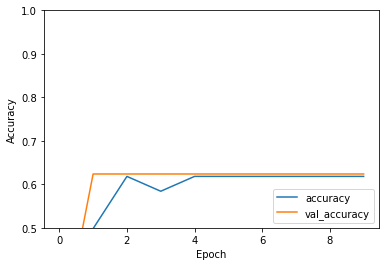

In [74]:
# Training
history = model.fit(hairtop_train_images, hairtop_train_labels, epochs=10, batch_size=512,
                    validation_data=(hairtop_test_images, hairtop_test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(hairtop_test_images,  hairtop_test_labels, verbose=2)

print(test_acc)

#Testing the model on hairtop in test image set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

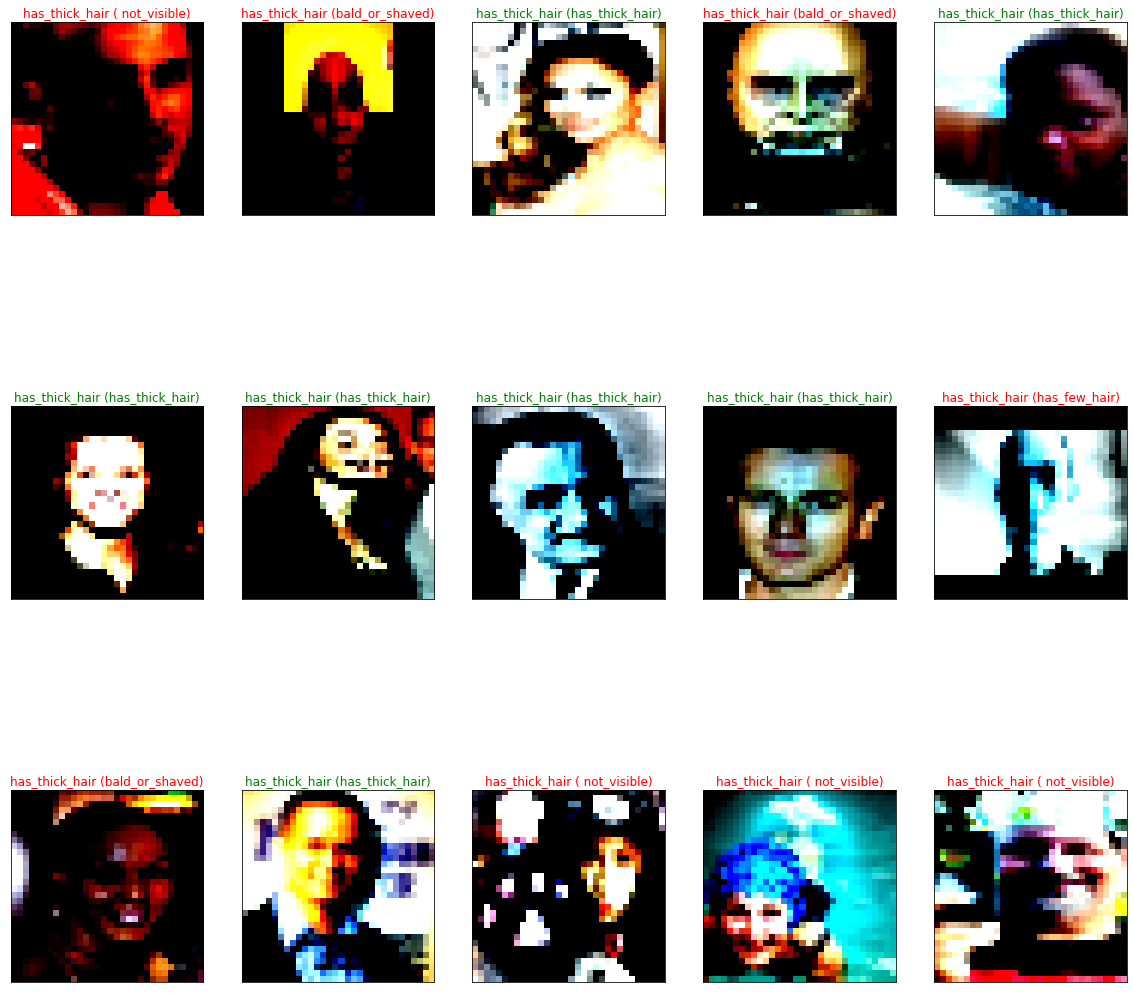

In [75]:
y_hat = model.predict(hairtop_test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(hairtop_test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(hairtop_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = hairtop_test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(hairtop_class_names[predict_index], 
                                  hairtop_class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Evaluating hairtop model performance

In [76]:
y_pred1 = model.predict(hairtop_test_images)
y_pred = np.argmax(y_pred1, axis=1)


print(classification_report(hairtop_test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(hairtop_test_labels, y_pred , average="macro"))
print(recall_score(hairtop_test_labels, y_pred , average="macro"))

print(f1_score(hairtop_test_labels, y_pred , average="macro"))
print(f1_score(hairtop_test_labels, y_pred , average="micro"))
print(f1_score(hairtop_test_labels, y_pred , average="weighted"))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        18
           2       0.62      1.00      0.77       247
           3       0.00      0.00      0.00        99

    accuracy                           0.62       396
   macro avg       0.16      0.25      0.19       396
weighted avg       0.39      0.62      0.48       396

0.15593434343434343
0.25
0.19206842923794712
0.6237373737373737
0.4792010305229589


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the glasses model

In [77]:
model.save('/content/drive/MyDrive/test1/hairtop.h5')

#Training the model on wrinkles

Epoch 1/10
4/4 [==============================] - 1s 168ms/step - loss: 2.6605 - accuracy: 0.0000e+00 - val_loss: 2.0140 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 1s 155ms/step - loss: 1.8375 - accuracy: 0.1207 - val_loss: 1.3989 - val_accuracy: 0.1970
Epoch 3/10
4/4 [==============================] - 1s 156ms/step - loss: 1.2473 - accuracy: 0.5278 - val_loss: 0.8463 - val_accuracy: 0.8056
Epoch 4/10
4/4 [==============================] - 1s 155ms/step - loss: 0.7773 - accuracy: 0.7775 - val_loss: 0.5868 - val_accuracy: 0.8056
Epoch 5/10
4/4 [==============================] - 1s 158ms/step - loss: 0.6211 - accuracy: 0.7775 - val_loss: 0.5158 - val_accuracy: 0.8056
Epoch 6/10
4/4 [==============================] - 1s 155ms/step - loss: 0.5485 - accuracy: 0.7775 - val_loss: 0.5243 - val_accuracy: 0.8056
Epoch 7/10
4/4 [==============================] - 1s 156ms/step - loss: 0.5379 - accuracy: 0.7775 - val_loss: 0.4933 - val_accuracy: 0.8056
Epoch 8/10
4

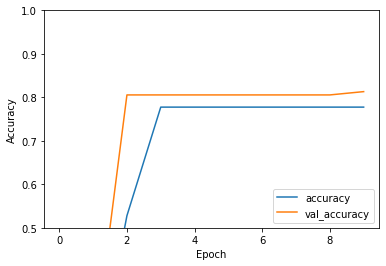

In [78]:
# Training
history = model.fit(wrinkles_train_images, wrinkles_train_labels, epochs=10, batch_size=512,
                    validation_data=(wrinkles_test_images, wrinkles_test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(wrinkles_test_images,  wrinkles_test_labels, verbose=2)

print(test_acc)

#Testing the model on wrinkles in test image set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

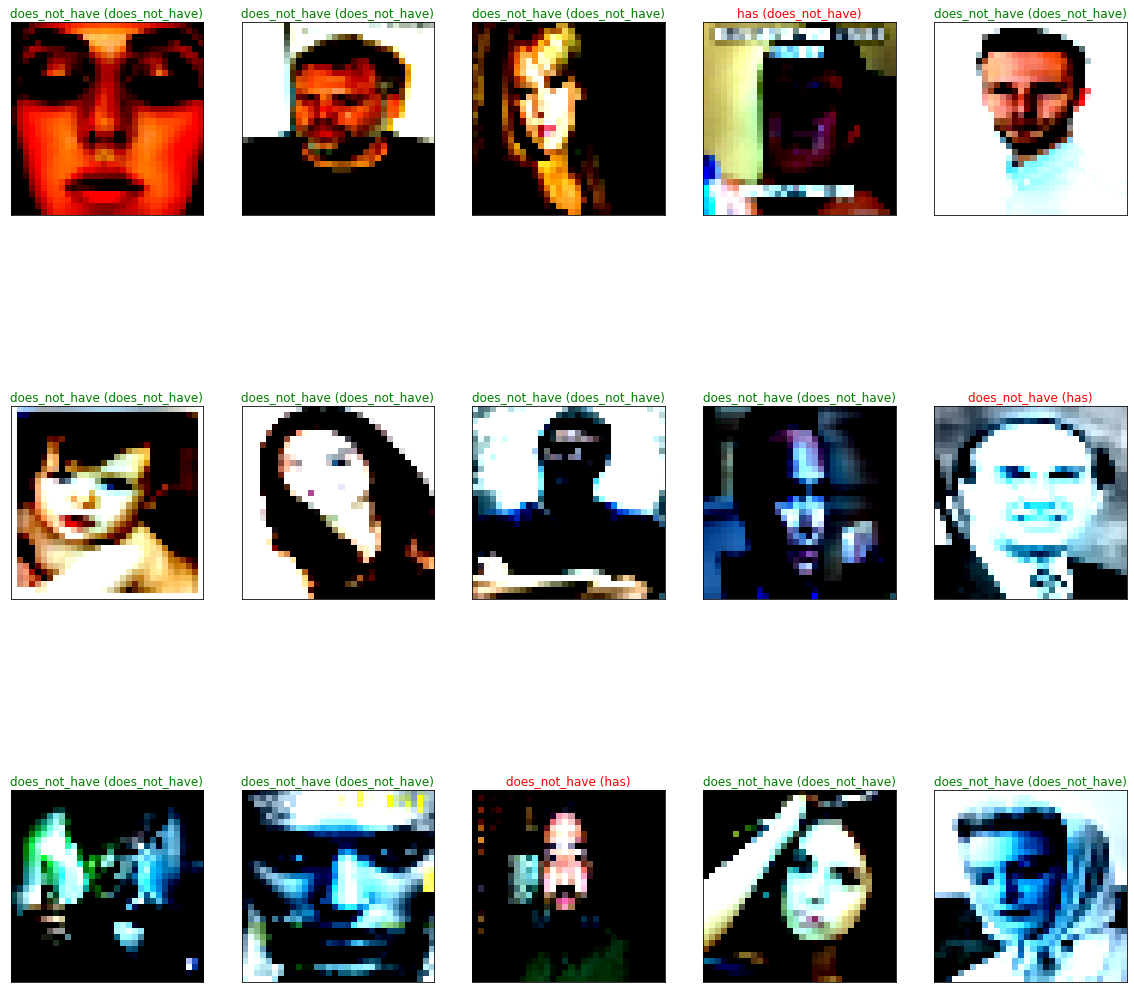

In [79]:
y_hat = model.predict(wrinkles_test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(wrinkles_test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(wrinkles_test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = wrinkles_test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(wrinkles_class_names[predict_index], 
                                  wrinkles_class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Evaluating wrinkles model performance

In [80]:
y_pred1 = model.predict(wrinkles_test_images)
y_pred = np.argmax(y_pred1, axis=1)


print(classification_report(wrinkles_test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(wrinkles_test_labels, y_pred , average="macro"))
print(recall_score(wrinkles_test_labels, y_pred , average="macro"))

print(f1_score(wrinkles_test_labels, y_pred , average="macro"))
print(f1_score(wrinkles_test_labels, y_pred , average="micro"))
print(f1_score(wrinkles_test_labels, y_pred , average="weighted"))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       319
           1       0.53      0.34      0.41        77

    accuracy                           0.81       396
   macro avg       0.69      0.63      0.65       396
weighted avg       0.79      0.81      0.80       396

0.6918190907486914
0.6327810120913568
0.6507936507936508
0.8131313131313131
0.7962962962962964


Saving the glasses model

In [81]:
model.save('/content/drive/MyDrive/test1/wrinkles.h5')